<a href="https://colab.research.google.com/github/itsZENR/GA_Knapsack_problem-geneticalgorithm-/blob/main/GA_Knapsack_problem(geneticalgorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Загрузка библиотеки
!pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15094 sha256=186921418545a9447913146ad06f24f771da067ba7d66f59fb690185d6a9c2c8
  Stored in directory: /root/.cache/pip/wheels/ef/91/3f/17cbea1e83d17cc01bd2d66a0d59e65301bcb2d59f2f6a62ab
Successfully built func-timeout


In [2]:
#@title Функция задачи о рюкзачке
#@markdown Необходимо максимизировать $\displaystyle\sum^{n}_{i=2}c_ix_i$ \\
#@markdown С ограничениями $\displaystyle\sum^{n}_{i=2}w_ix_i \leq W$ и $x_i \in \{0,1\}$

def decode1(x):
  n = 20 # Количество пунктов
  w = [2,5,18,3,2,5,10,4,8,12,5,10,7,15,11,2,8,10,5,9] # Весовой список каждого элемента
  c = [5,10,12,4,3,11,13,10,7,15,8,19,1,17,12,9,15,20,2,6] # Список цен на каждый товар
  #@markdown Объем рюкзака:
  W = 40 #@param {type:"slider", min:0, max:100, step:1}
  
  s=[]# Сохранить коллекцию нижних индексов выбранного объекта
  g=0
  f=0
  for i in range(n):
    if x[i] == 1:
        if g+w[i] <= W:
            g = g+w[i]
            f = f+c[i]
            s.append(i)
        else:
            f = -100000000
            break
  return f,s

In [3]:
#@title Ну это уже перебор
k = 20
max = 0
max_a = []

def check(a):
    global max
    global max_a
    f,s = decode1(a)
    if f > max:
      max = f
      max_a = s
    

def find(i):
    if i == k:
        check(a)
        return
    a[i] = 0
    find(i + 1)
    a[i] = 1
    find(i + 1)


a = [None] * k
find(0)
print("Максимальная стоимость содержимого рюкзака:", max)
print("Номера предметов которые надо взять", max_a)

Максимальная стоимость содержимого рюкзака: 87
номера предметов которые надо взять [0, 1, 4, 5, 7, 11, 15, 17]


 The best solution found:
 [1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]

 Objective function:
 -87.0


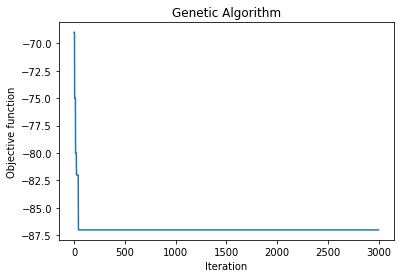

In [ ]:
#@title Генетический алгоритм

import numpy as np
from geneticalgorithm import geneticalgorithm as ga


n = 20
#@markdown Размер популяции
max_num_iteration = 100 #@param {type:"integer"}
#@markdown Процент элитного населения
elit_ratio = 1 #@param {type:"slider", min:0, max:100, step:1}






def f(x):
    return -decode1(x)[0]

varbound=np.array([[0,1]]*n)

algorithm_param = {'max_num_iteration': 3000,\
                   'population_size':max_num_iteration,\
                   'mutation_probability':0.1,\
                   'elit_ratio': (elit_ratio/100),\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function = f,\
            dimension=n,\
            variable_type='int',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()